# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Diwa
- **Email:** cdaspro5@gmail.com
- **ID Dicoding:** [diwa_prasetyo_ekSz]

## Menentukan Pertanyaan Bisnis

- Bagaimana trend penjualan perentalan sepeda di 4 cuaca?
- Bagaimana trend penjualan perantalan sepeda di 4 musim?


## Import Semua Packages/Library yang Digunakan

In [31]:
#pip install streamlit

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import streamlit as st

## Data Wrangling

### Gathering Data

In [33]:
url ='https://raw.githubusercontent.com/DiwaPrasetyo02/submission-data-analysis/main/day.csv'
df = pd.read_csv(url)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [34]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
df.duplicated().sum()

0

### Cleaning Data

In [63]:
# Mengonversi kolom tanggal
df['dteday'] = pd.to_datetime(df['dteday'])

In [61]:
# Menentukan kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=[float, int])

In [64]:
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
month          0
day_of_week    0
dtype: int64

In [66]:
print("Jumlah Duplikasi: ", df.duplicated().sum())
df.describe()

Jumlah Duplikasi:  0


,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,month,day_of_week
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,6.519836,3.002736
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,4.000000,1.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,7.000000,3.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,10.000000,5.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,12.000000,6.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,3.451913,2.004787


Pada tahap cleaning data diatas, tidak ditemukan missing value dan duplicated data. Terdapat perubahan tipe data date dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [39]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


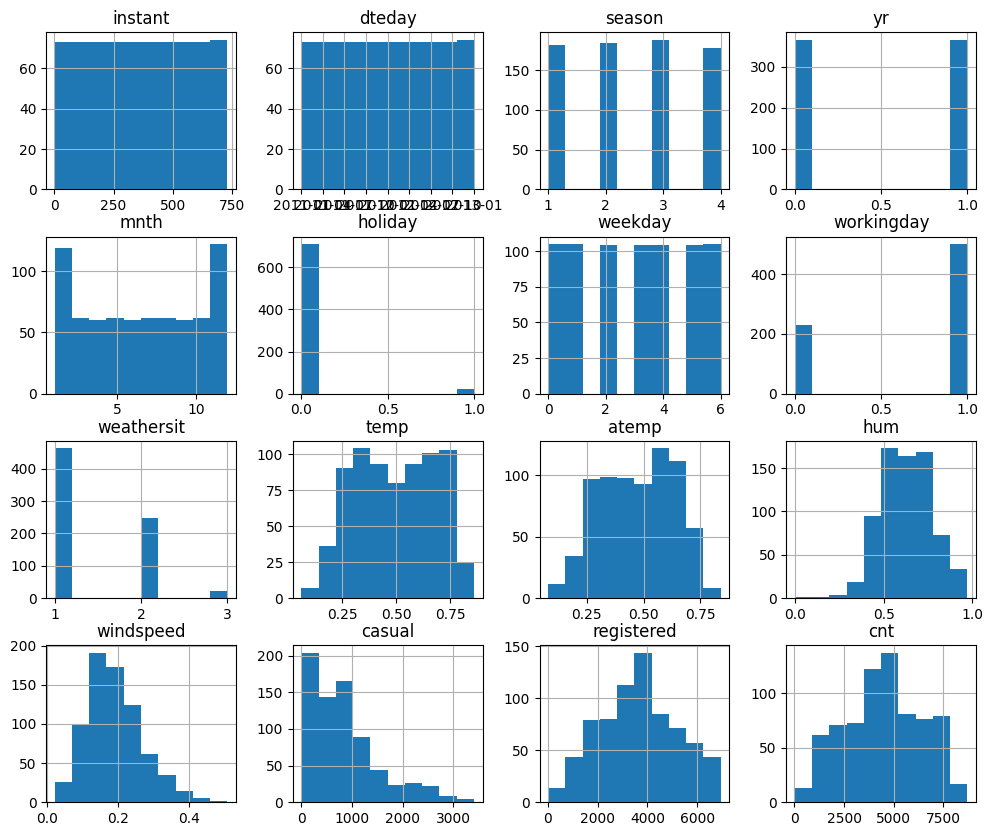

In [40]:
# Membuat histogram dengan ukuran kustom
df.hist(figsize=(12, 10))  # Ukuran grafik diatur ke 12x8 inci
plt.show()

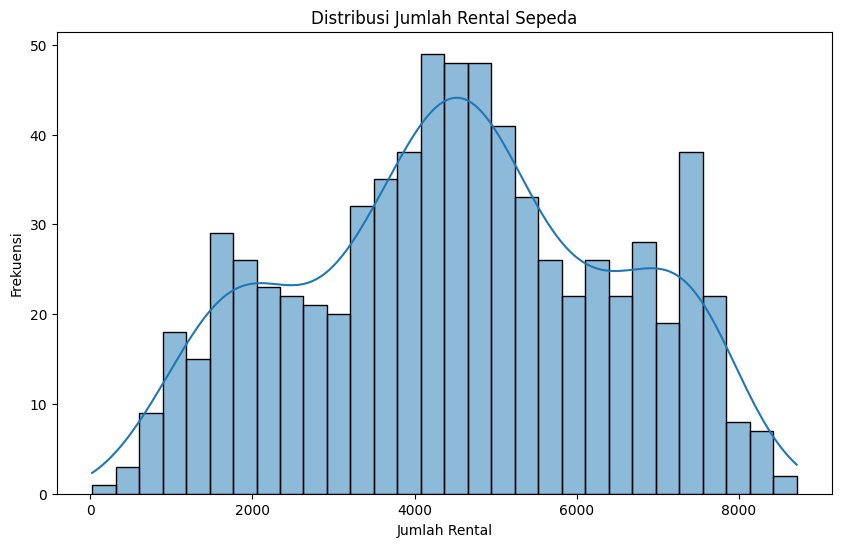

In [41]:
# Distribusi Jumlah rental sepeda
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Rental Sepeda')
plt.xlabel('Jumlah Rental')
plt.ylabel('Frekuensi')
plt.show()


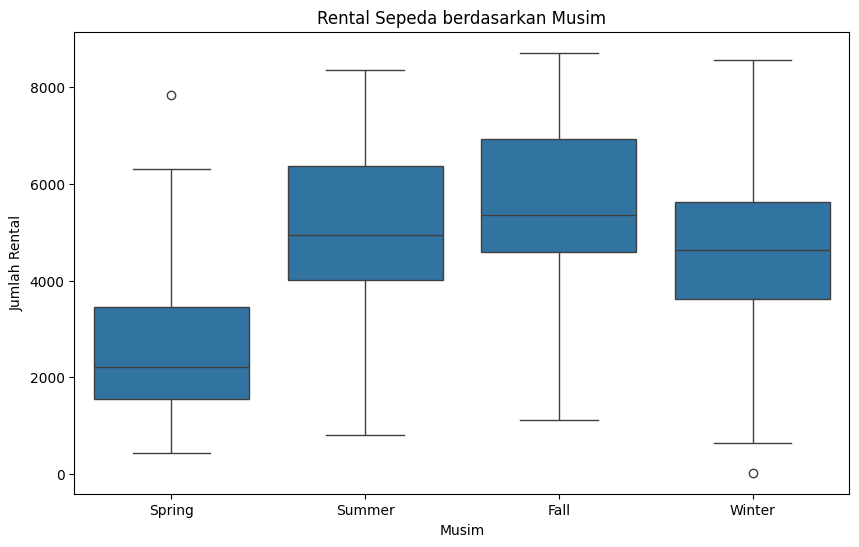

In [42]:
# Rental sepeda berdasarkan musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Rental Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental')
plt.show()


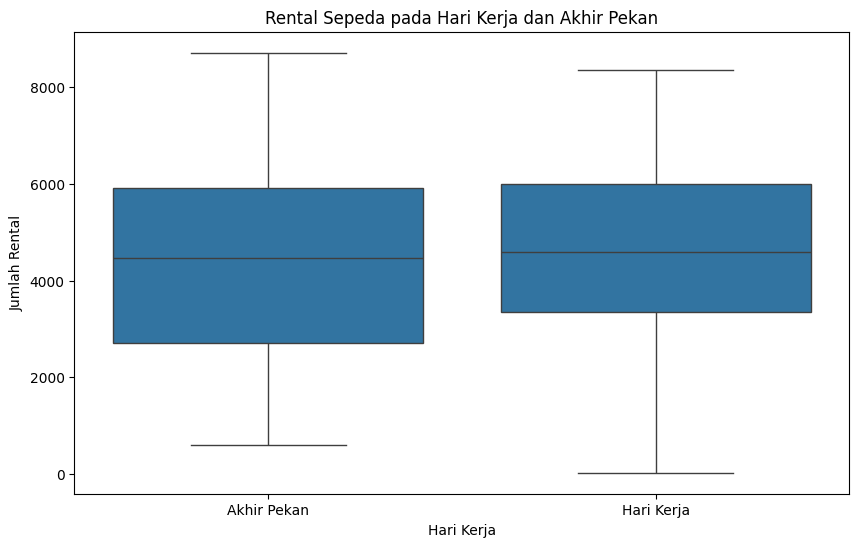

In [43]:
# Rental Sepeda berdasarkan Hari kerja
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Rental Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Rental')
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.show()


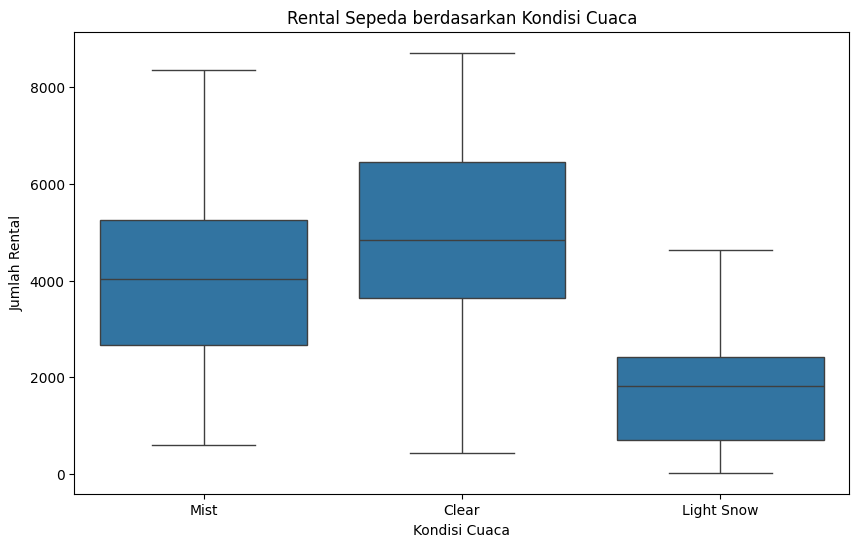

In [44]:
# Rental sepeda berdasarkan cuaca
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
df['weathersit'] = df['weathersit'].map(weather_map)

plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Rental Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental')
plt.show()


<ipython-input-45-61c691f3f6cd>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='cnt', data=df, estimator='mean', ci=None)


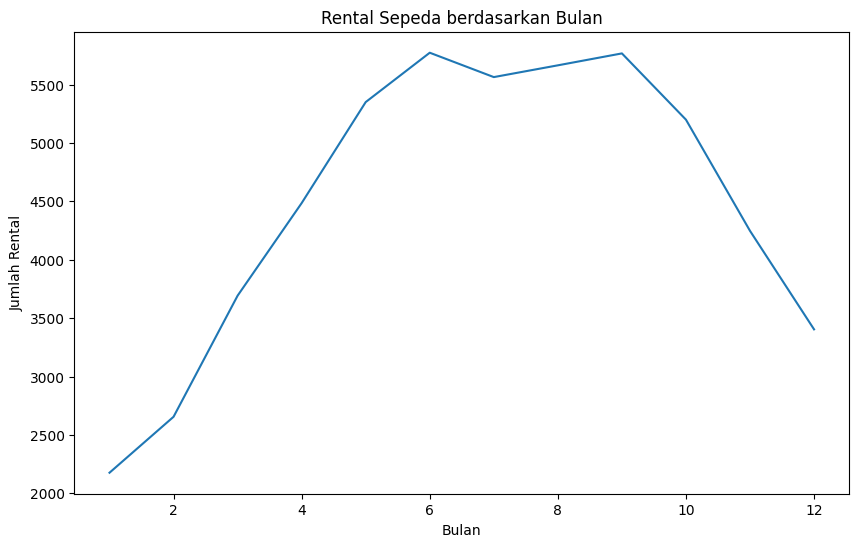

In [45]:
# rental sepeda berdasarkan bulan
df['month'] = df['dteday'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='cnt', data=df, estimator='mean', ci=None)
plt.title('Rental Sepeda berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental')
plt.show()


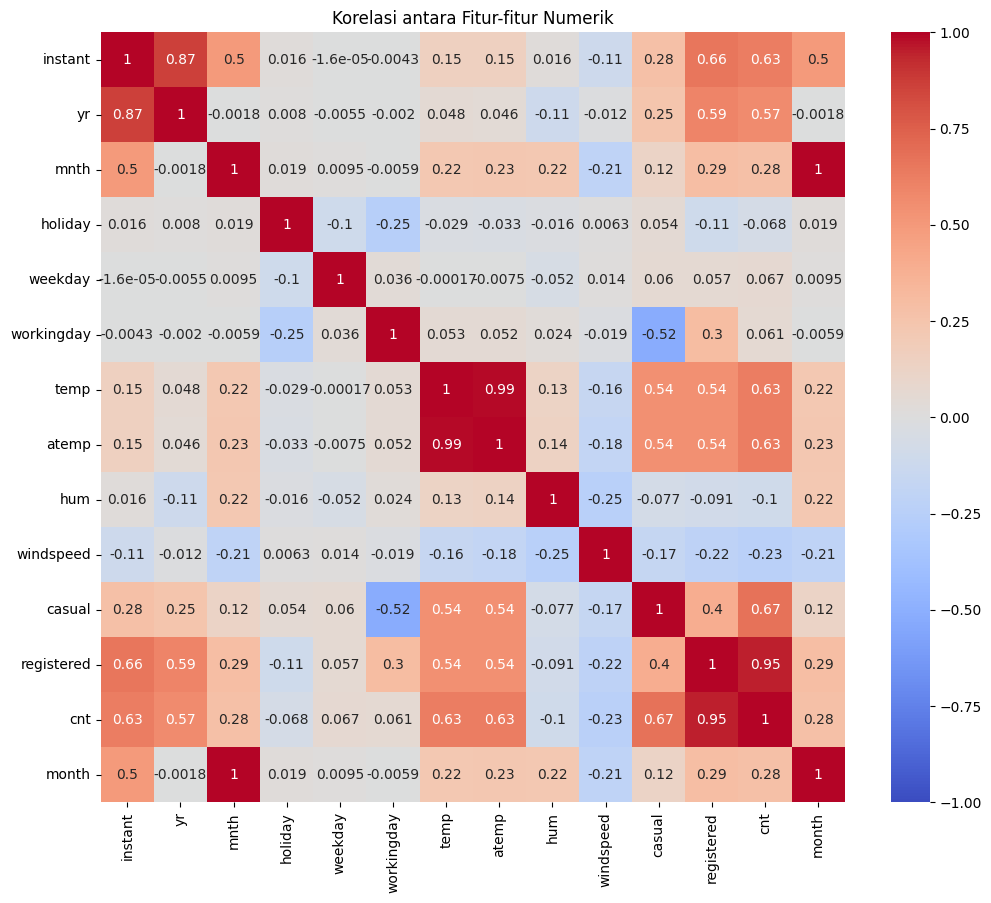

In [46]:
# Menentukan kolom numerik
numeric_df = df.select_dtypes(include=[float, int])

# Menampilkan korelasi antara fitur-fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Fitur-fitur Numerik')
plt.show()

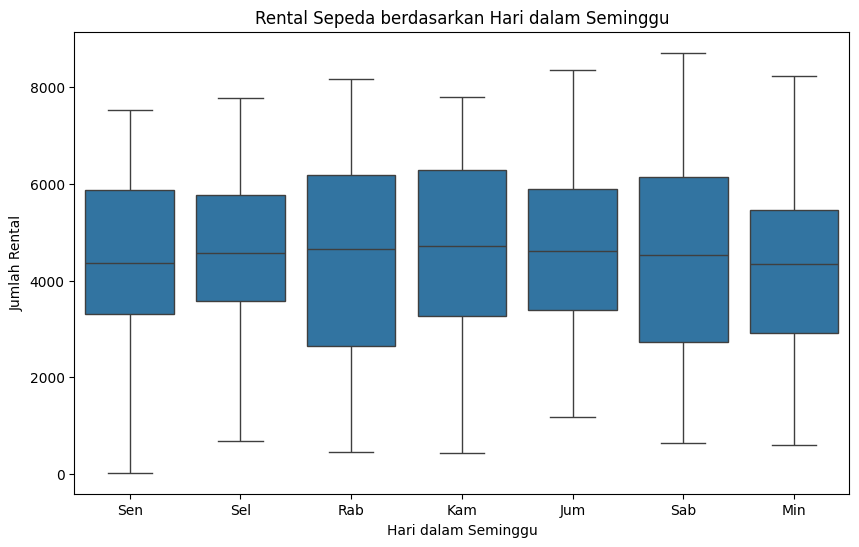

In [47]:
# Distribusi Rental Sepeda berdasarkan Hari dalam Seminggu
df['day_of_week'] = df['dteday'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='cnt', data=df)
plt.title('Rental Sepeda berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Rental')
plt.xticks(range(7), ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.show()


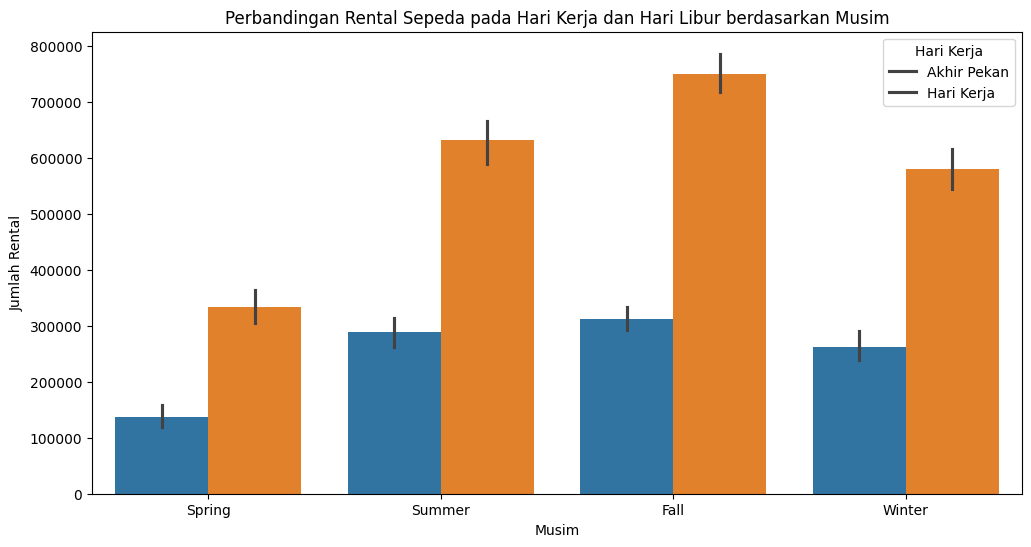

In [48]:
# Perbandingan Rental Sepeda pada Hari Kerja dan Hari Libur berdasarkan Musim
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', hue='workingday', data=df, estimator=sum)
plt.title('Perbandingan Rental Sepeda pada Hari Kerja dan Hari Libur berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental')
plt.legend(title='Hari Kerja', labels=['Akhir Pekan', 'Hari Kerja'])
plt.show()


## Visualization & Explanatory Analysis

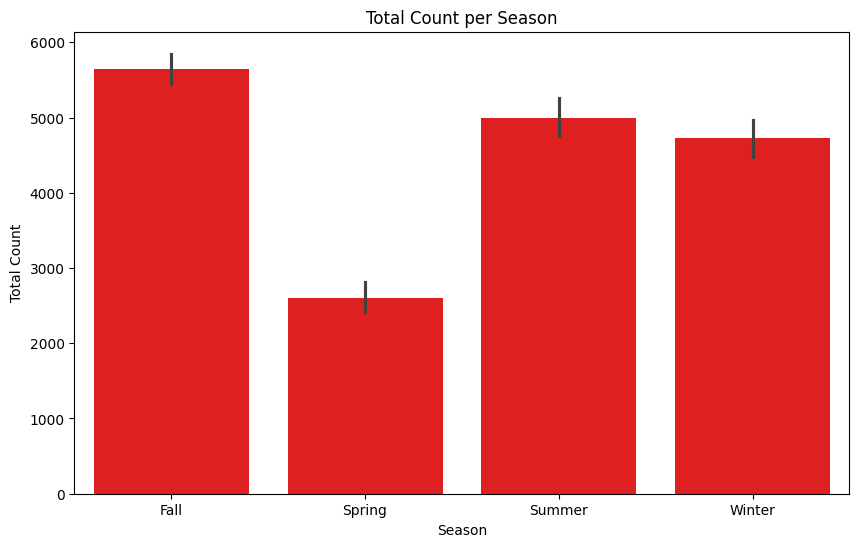

In [57]:
# Mengelompokkan data berdasarkan musim dan menjumlahkan total perentalan untuk setiap musim
season_counts = df.groupby(['season', 'dteday'])['cnt'].sum().reset_index()
season_counts['season'] = season_counts['season'].replace(season_map)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_counts, color="red")
plt.title('Total Count per Season')
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.show()

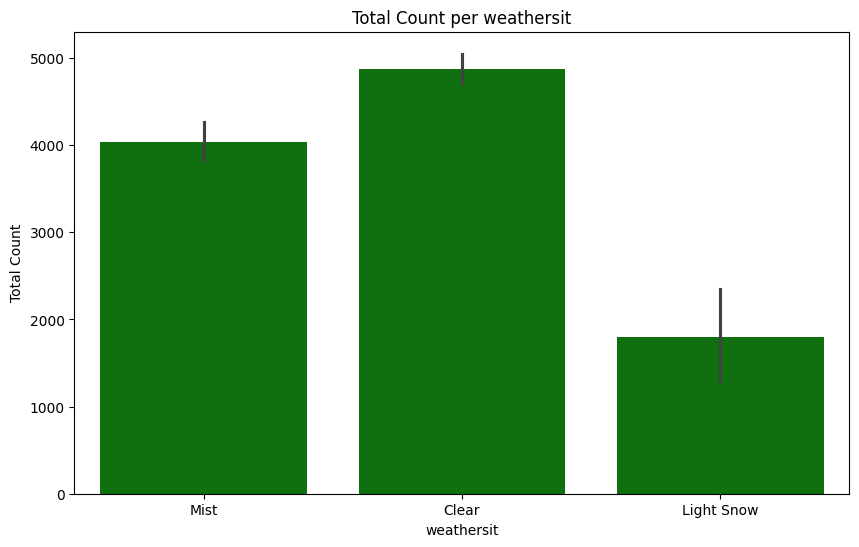

In [58]:
# Visualisasi jumlah rental sepeda berdasarkan kondisi cuaca
weather_counts = df.groupby(['dteday', 'weathersit'])['cnt'].sum().reset_index()
weather_counts['weathersit'] = weather_counts['weathersit'].replace(weather_map)

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_counts, color="green")
plt.title('Total Count per weathersit')
plt.xlabel('weathersit')
plt.ylabel('Total Count')
plt.show()

### Pertanyaan 1:

Bagaimana trend penjualan perentalan sepeda di 4 cuaca?



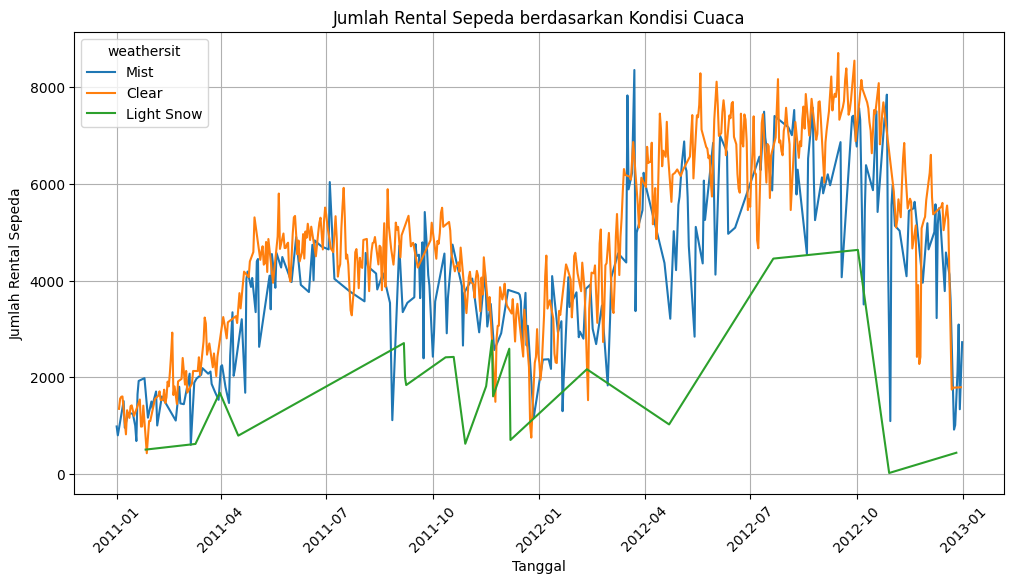

In [59]:
# Visualisasi jumlah rental sepeda berdasarkan kondisi cuaca
weather_counts = df.groupby(['dteday', 'weathersit'])['cnt'].sum().reset_index()
weather_counts['weathersit'] = weather_counts['weathersit'].replace(weather_map)

fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', hue='weathersit', data=weather_counts, ax=ax1)
ax1.set_xlabel("Tanggal")
ax1.set_ylabel("Jumlah Rental Sepeda")
ax1.set_title("Jumlah Rental Sepeda berdasarkan Kondisi Cuaca")
ax1.tick_params(axis='x', rotation=45)
# Menambahkan interaktivitas
ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.format_ydata = lambda x: f'{x:.0f}'
ax1.grid(True)

plt.show()

### Pertanyaan 2:

Bagaimana trend penjualan perantalan sepeda di 4 musim?

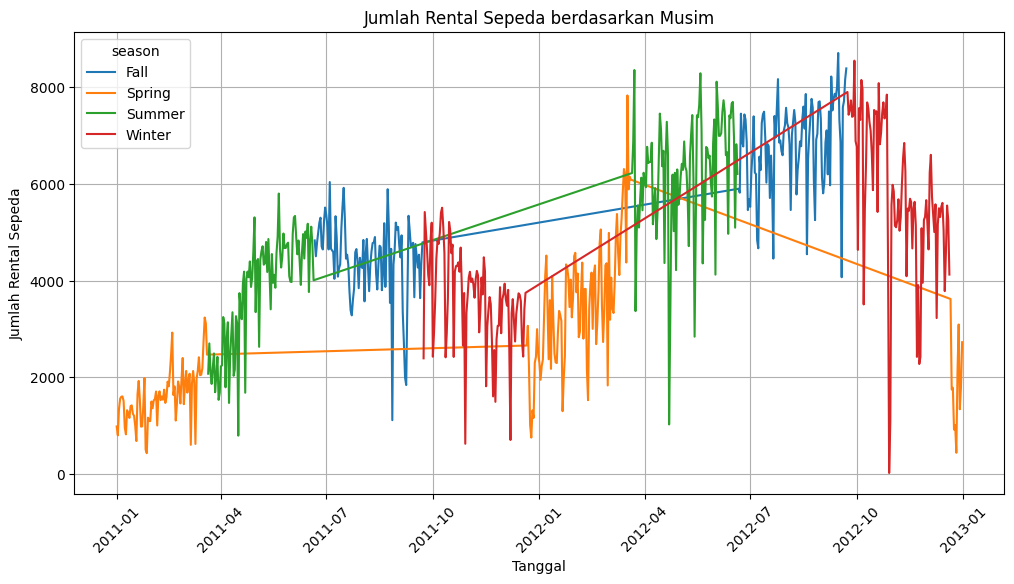

In [60]:
season_counts = df.groupby(['season', 'dteday'])['cnt'].sum().reset_index()
season_counts['season'] = season_counts['season'].replace(season_map)

fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', hue='season', data=season_counts, ax=ax2)
ax2.set_xlabel("Tanggal")
ax2.set_ylabel("Jumlah Rental Sepeda")
ax2.set_title("Jumlah Rental Sepeda berdasarkan Musim")
ax2.tick_params(axis='x', rotation=45)
# Menambahkan interaktivitas
ax2.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax2.format_ydata = lambda x: f'{x:.0f}'
ax2.grid(True)

plt.show()

## Conclusion

- Hasil dari analisis, bagaimana trend penjualan perentalan sepeda di 4 cuaca?

Dari data yang disajikan pada saat cuaca cerah maka transaksi cenderung naik, selama perentalan tidak terjadi hujan lebat.
- Hasil dari analisis, bagaimana trend penjualan perentalan sepeda di 4 musim?

Dari data yang disajikan penjualan sepeda pada musim panas akan meningkat, akan tetapi pada waktu tertentu juga menurun drastis. Hal ini kemungkinan terjadi karena temperatur suhu yang meningkat sehingga hanya sedikit orang yang keluar.


In [53]:
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Streamlit version:", st.__version__)

Pandas version: 2.0.3
Seaborn version: 0.13.1
Matplotlib version: 3.7.1
Streamlit version: 1.35.0
